In [2]:
print('123')

123


In [3]:
import torch

In [4]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [5]:
x.shape

torch.Size([12])

In [6]:
X = x.reshape(3, 4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [7]:
help(torch.reshape)

Help on built-in function reshape in module torch:

reshape(...)
    reshape(input, shape) -> Tensor
    
    Returns a tensor with the same data and number of elements as :attr:`input`,
    but with the specified shape. When possible, the returned tensor will be a view
    of :attr:`input`. Otherwise, it will be a copy. Contiguous inputs and inputs
    with compatible strides can be reshaped without copying, but you should not
    depend on the copying vs. viewing behavior.
    
    See :meth:`torch.Tensor.view` on when it is possible to return a view.
    
    A single dimension may be -1, in which case it's inferred from the remaining
    dimensions and the number of elements in :attr:`input`.
    
    Args:
        input (Tensor): the tensor to be reshaped
        shape (tuple of ints): the new shape
    
    Example::
    
        >>> a = torch.arange(4.)
        >>> torch.reshape(a, (2, 2))
        tensor([[ 0.,  1.],
                [ 2.,  3.]])
        >>> b = torch.tensor([[0,

In [8]:
torch.zeros((2, 3, 4))


tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [9]:
torch.ones((2, 3, 4))


tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [10]:
torch.randn(3, 4)


tensor([[-0.4713,  0.4836,  0.5733, -0.3711],
        [ 1.4717,  1.1996, -0.2506,  1.1876],
        [-0.7245,  0.5910,  1.1246, -0.1683]])

In [11]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])


tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [12]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y 

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [13]:
torch.exp(x)


tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [14]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [15]:
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
Y

tensor([[2., 1., 4., 3.],
        [1., 2., 3., 4.],
        [4., 3., 2., 1.]])

In [16]:
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)


(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [17]:
Z = X == Y

In [18]:
Z
Z.shape

torch.Size([3, 4])

In [19]:
X.shape

torch.Size([3, 4])

Z

In [20]:
X.sum

<function Tensor.sum>

In [21]:
X.sum()

tensor(66.)

In [22]:
X[-1]

tensor([ 8.,  9., 10., 11.])

In [23]:
X[1:3]

tensor([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [24]:
print(1)


1


In [25]:
import math
import time
import numpy as np
import torch
from  d2l import torch as d2l

In [26]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)
a,b

(tensor([1., 1., 1.,  ..., 1., 1., 1.]),
 tensor([1., 1., 1.,  ..., 1., 1., 1.]))

In [27]:
class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

In [28]:
c = torch.zeros(n)
c

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [29]:
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.12709 sec'

In [30]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'


'0.00000 sec'

In [31]:
torch.cuda.is_available()

True

In [32]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi) / sigma * np.exp(-0.5 / sigma ** 2 * (x - mu) ** 2)
    return p

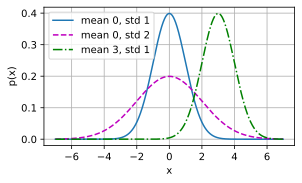

In [33]:
x = np.arange(-7, 7, 0.01)
params = [(0,1), (0,2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x', ylabel='p(x)', figsize=(4.5, 2.5), legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

In [34]:
import random
import torch
from d2l import torch as d2l

In [35]:
def synthetic_data(w, b, num_examples):
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = d2l.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [36]:
true_w = torch.tensor([2, -3.4])
true_w
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

print('features:', features[0],'\nlabel:', labels[0])


features: tensor([0.3221, 0.2886]) 
label: tensor([3.8706])


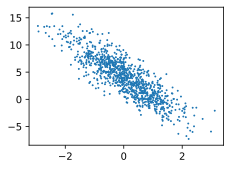

In [37]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [38]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)])
        yield features.index_select(0, j), labels.index_select(0, j)

In [39]:
batch_size = 10
for X,y in data_iter(batch_size, features, labels):
    print(X,'\n',y)
    break

tensor([[ 0.2264,  1.9987],
        [-1.3404,  0.7292],
        [ 0.3040,  0.6815],
        [ 1.7141, -0.6506],
        [ 0.3632, -0.4852],
        [ 0.9992, -0.4792],
        [ 2.5848, -0.1421],
        [-0.4621, -0.2081],
        [ 1.3663, -0.6329],
        [-0.6735, -0.2504]]) 
 tensor([[-2.1277],
        [-0.9753],
        [ 2.4825],
        [ 9.8220],
        [ 6.5813],
        [ 7.8262],
        [ 9.8539],
        [ 3.9847],
        [ 9.0736],
        [ 3.7124]])


In [40]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [41]:
def linreg(X, w, b ):
    return torch.matmul(X, w) + b

In [42]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [43]:

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2


In [44]:
lr = 0.03
num_epochs = 30
net = linreg
loss = squared_loss

In [45]:
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size, features, labels):
        l = loss(net(X, w,b), y)
        l.sum().backward()
        sgd([w,b], lr, batch_size)
    with torch.no_grad():
        train_l  = loss(net(features, w, b), labels )
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):.3f}')

print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

epoch 1, loss 0.052
epoch 2, loss 0.000
epoch 3, loss 0.000
epoch 4, loss 0.000
epoch 5, loss 0.000
epoch 6, loss 0.000
epoch 7, loss 0.000
epoch 8, loss 0.000
epoch 9, loss 0.000
epoch 10, loss 0.000
epoch 11, loss 0.000
epoch 12, loss 0.000
epoch 13, loss 0.000
epoch 14, loss 0.000
epoch 15, loss 0.000
epoch 16, loss 0.000
epoch 17, loss 0.000
epoch 18, loss 0.000
epoch 19, loss 0.000
epoch 20, loss 0.000
epoch 21, loss 0.000
epoch 22, loss 0.000
epoch 23, loss 0.000
epoch 24, loss 0.000
epoch 25, loss 0.000
epoch 26, loss 0.000
epoch 27, loss 0.000
epoch 28, loss 0.000
epoch 29, loss 0.000
epoch 30, loss 0.000
w的估计误差: tensor([ 0.0007, -0.0001], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0001], grad_fn=<RsubBackward1>)


In [46]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

In [47]:
def load_array(date_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*date_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

next(iter(data_iter))

[tensor([[ 0.1843,  0.1159],
         [ 1.8095, -1.7813],
         [ 0.8695,  0.3344],
         [ 0.7437,  0.0246],
         [-1.9117,  0.5564],
         [ 0.3162, -1.0276],
         [-0.6255, -0.2960],
         [ 1.1390, -0.2880],
         [-0.2139, -1.6751],
         [ 0.6159,  0.3250]]),
 tensor([[ 4.1646],
         [13.8735],
         [ 4.8069],
         [ 5.5935],
         [-1.5093],
         [ 8.3521],
         [ 3.9603],
         [ 7.4628],
         [ 9.4747],
         [ 4.3457]])]

In [48]:
from  torch  import  nn
net = nn.Sequential(nn.Linear(2,1))

In [49]:
net[0].weight.data.normal_(0.0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [50]:
loss = nn.MSELoss()

In [51]:
trainer = torch.optim.SGD(net.parameters(), lr=0.01)

In [52]:
num_epochs = 3000
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y )
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.551633
epoch 2, loss 0.009141
epoch 3, loss 0.000250
epoch 4, loss 0.000108
epoch 5, loss 0.000107
epoch 6, loss 0.000107
epoch 7, loss 0.000107
epoch 8, loss 0.000107
epoch 9, loss 0.000107
epoch 10, loss 0.000107
epoch 11, loss 0.000107
epoch 12, loss 0.000107
epoch 13, loss 0.000107
epoch 14, loss 0.000107
epoch 15, loss 0.000107
epoch 16, loss 0.000107
epoch 17, loss 0.000107
epoch 18, loss 0.000107
epoch 19, loss 0.000107
epoch 20, loss 0.000107
epoch 21, loss 0.000107
epoch 22, loss 0.000107
epoch 23, loss 0.000107
epoch 24, loss 0.000107
epoch 25, loss 0.000107
epoch 26, loss 0.000107
epoch 27, loss 0.000107
epoch 28, loss 0.000107
epoch 29, loss 0.000107
epoch 30, loss 0.000107
epoch 31, loss 0.000107
epoch 32, loss 0.000107
epoch 33, loss 0.000107
epoch 34, loss 0.000107
epoch 35, loss 0.000107
epoch 36, loss 0.000107
epoch 37, loss 0.000107
epoch 38, loss 0.000107
epoch 39, loss 0.000107
epoch 40, loss 0.000107
epoch 41, loss 0.000107
epoch 42, loss 0.000107
e

KeyboardInterrupt: 

In [67]:
w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

w的估计误差： tensor([ 3.5405e-05, -6.9380e-05])
b的估计误差： tensor([-0.0008])


In [53]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

In [55]:
trans = transforms.ToTensor()
mnist_tranin = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=trans, download=True)

In [73]:
len(mnist_tranin), len(mnist_test)

(60000, 10000)

In [56]:
mnist_tranin[0][0].shape

torch.Size([1, 28, 28])

In [57]:
def get_fashion_mnist_labels(labels):  #@save
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [58]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes


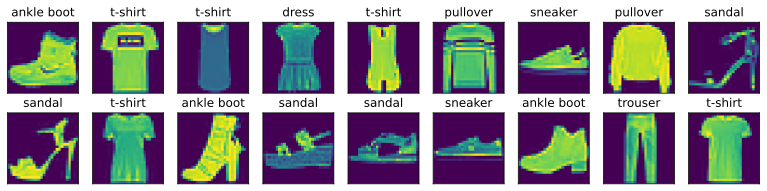

In [59]:
X, y = next(iter(data.DataLoader(mnist_tranin, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));

In [61]:
batch_size = 256

def get_dataloader_workers():  #@save
    """使用4个进程来读取数据"""
    return 4

train_iter = data.DataLoader(mnist_tranin, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers())

In [63]:
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'4.85 sec'

In [64]:
def load_data_fashion_mnist(batch_size, resize=None):  #@save
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

In [65]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


In [66]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)

In [67]:
num_inputs, num_outputs = 784, 10
W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

In [68]:
x = torch.tensor([[1.0, 2, 3], [4, 5, 6]])
print(x)
print(x.sum(axis=0, keepdim=True))
print(x.sum(axis=1, keepdim=True))
print(x.sum(axis=0, keepdim=False))
print(x.sum(axis=1, keepdim=False))

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[5., 7., 9.]])
tensor([[ 6.],
        [15.]])
tensor([5., 7., 9.])
tensor([ 6., 15.])


In [69]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(axis=1, keepdim=True)
    return X_exp / partition

In [70]:
X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.4799, 0.1499, 0.0227, 0.3158, 0.0317],
         [0.0517, 0.6834, 0.1315, 0.0556, 0.0778]]),
 tensor([1., 1.]))

In [72]:
"""定义模型"""
def net(X):
    return softmax(torch.matmul(X.reshape(-1, W.shape[0]), W) + b)


In [76]:
y = torch.tensor([0, 2])
y
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0, 2])

In [77]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y])

cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

In [78]:
A = torch.arange(20).reshape(5, 4)   

In [79]:
A


tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [80]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

RuntimeError: The size of tensor a (4) must match the size of tensor b (5) at non-singleton dimension 1